# Introducción

¿Para qué se necesitan los métodos multivariantes? ¿Cuáles son los inconvenientes de analizar una variable a la vez?

## Objetivos de las técnicas multivariantes

Como un ejemplo de un análisis multivariante vamos a crear un intervalo de confianza conjunto (simultáneo) de 95% de la mediana de los precios de los precios del alquiler de un apartamento y de la compra de vivienda en cada estado de los EEUU.

In [1]:
housing <- read.table(file = "data//housing.txt")
head(housing)

,Apartment,House
,<int>,<dbl>
AK,949,237.8
AL,631,121.5
AR,606,105.7
AZ,866,229.2
CA,1135,467.0
CO,848,242.2


Los intervalos de confianza marginales de 95% para cada variable se muestran como un rectángulo, mientras que el intervalo bivariante se representa como un elipsoide. La siguiente función nos sirve para calcular el intervalo de confianza bivariante.

`s` es la matriz de covarianzas, `xbar` es un vector de medias, `n` el número de observaciones, `alpha` la probabilidad, y `m` el número de puntos utilizado para representarlo.

In [2]:
bivCI <- function(s, xbar, n, alpha, m){
#  returns m (x,y) coordinates of 1-alpha 
# joint confidence ellipse of mean

    # m points on a unit circle  
    x <- sin(2 * pi * (0 : (m - 1)) / (m - 1))  
    y <- cos(2 * pi * (0 : (m - 1)) / (m - 1))
    # chisquared critical value
    cv <-  qchisq(1 - alpha, 2)
    # value of quadratic form
    cv <- cv / n                                 
    for (i in 1 : m){
         pair <- c(x[i], y[i])        # ith (x,y) pair
         q <- pair %*% solve(s, pair) # quadratic form
         x[i] <- x[i] * sqrt(cv / q) + xbar[1]
         y[i] <- y[i] * sqrt(cv / q) + xbar[2]
    }
    cbind(x, y)
}

Calculamos los intervalos de confianza individuales. 95% es la probabilidad por defecto.

In [3]:
aptci <- t.test(housing$Apartment)$conf.int
hoci <- t.test(housing$House)$conf.int

Y dibujamos el gráfico correspondiente.

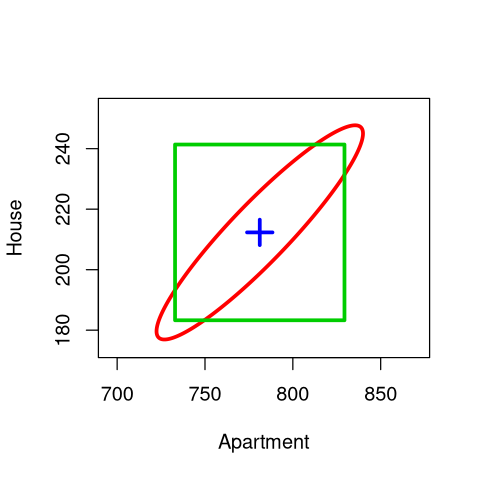

In [4]:
library(repr)

options(repr.plot.width=4, repr.plot.height=4)

plot(bivCI(var(housing), colMeans(housing), 
     dim(housing)[1], .05, 2000), lwd = 3,
     type = "l", xlab = colnames(housing)[1], 
     ylab = colnames(housing)[2], col = 2,
     xlim = aptci * c(.95, 1.05),
     ylim = hoci * c(.95, 1.05))

lines(colMeans(housing)[1], colMeans(housing)[2], pch = 3, 
      cex = 2, type = "p", col = 4, lwd = 3)

lines(aptci[c(1, 2, 2, 1, 1)], hoci[c(1, 1, 2, 2, 1)], 
      type = "l", col = 3, lwd = 3)

El área elíptica y el rectángulo se superponen. También hay áreas que están incluidas en una figura, pero no en la otra. Más importante aún, notemos que el área de la elipse es más pequeña que la del rectángulo. Esta diferencia en el área ilustra el beneficio de usar métodos multivariados sobre el enfoque marginal.

Si utilizáramos métodos univariantes y obtuviéramos intervalos de confianza para cada variable individualmente, entonces la región de confianza resultante sería mayor que la región que tiene en cuenta la relación bivariante de alquileres de apartamentos y precios de vivienda. Esta figura proporciona una ilustración gráfica de los beneficios de usar métodos multivariados sobre el uso de una serie de análisis univariados.

## Reducción de datos o simplificación estructural

Aunque los expertos que realizan un estudio recogen los medidas que se consideran más útiles, la primera tarea del analista consiste en determinar cuáles variables son las que requieren nuestra atención. Muchos de los datos recabados pueden ser redundantes. Un objetivo del análisis de datos consiste en identificar los datos/variables que se deben mantener y los que pueden descartarse de forma segura.

Consideremos los datos de los resultados de las pruebas estandarizadas PISA para distintos países o economías. La prueba PISA básicamente evalúa las capacidades académicas de estudiantes de 15 años de edad en 70 países diferentes.

La puntuación total se divide en 5 subescalas diferentes que miden destrezas específicas. La puntuación de matemáticas y ciencia se indica aparte. ¿Qué beneficio ofrecen tener las distintas subescalas?, ¿Es posible eliminar o combinar subescalas sin que se pierda mucho detalles?

A continuación gráficamos una matriz de diagramas de dispersión de las ocho puntuaciones para los países OECD del año 2019:

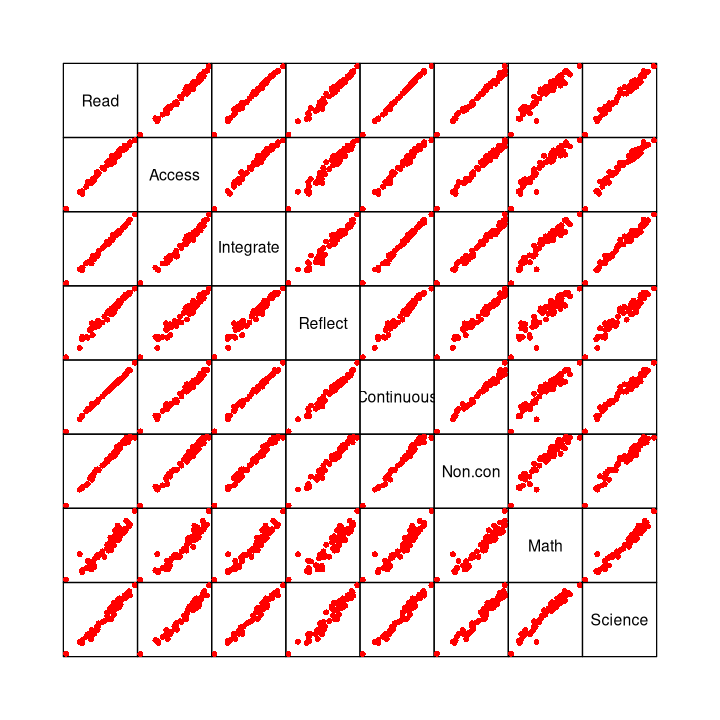

In [5]:
options(repr.plot.width=6, repr.plot.height=6)

PISA <- read.table(file = "data/OECD PISA.txt", 
                   row.names= 1, header=TRUE)
pairs(PISA, gap = 0, col="red", pch=16, xaxt="n", yaxt="n")

La impresión inmediata que obtenemos de esta figura es que están altamente correlacionadas todas las mediciones entre sí.

Hay algunos valores atípicos y algunos pares de mediciones están más estrechamente correlacionados, por supuesto, pero está claro que cualquier medida académica en los datos podría ser una buena representación para la mayoría de las demás. 

Es evidente que se pueden simplificar estos datos en gran medida sin una pérdida significativa de información.

## Agrupación y clasificación de observaciones

En el 2006 Plutón dejó de ser considerado un planeta de nuestro sistema solar. La argumentación consistió en el hecho que hay una gran cantidad de objetos mayores y menores orbitando el sol a una distancia similar.

Uno de estos grupos recibe el nombre de *Cinturón de Kuiper* que están a partir de la órbita de Netptuno de 30 a 55 unidades astronómicas (una unidad astronómica equivale a la distancia de la tierra al sol).

El *Albedo* se refiere a la relación porcentual entre la luz reflejada y la absorbida. La *magnitud absoluta* es una medida del brillo aparente, corregida por la distancia del objeto, medido en una distancia algorítmica.
Una magnitud absoluta mayor indica objetos más oscuros. El *eje semimayor* es la mayor distancia de la órbita al sol, medida en UA. 

Muchos de los valores de esta tabla son, en el mejor de los casos, estimaciones aproximadas de estos objetos distantes y poco comprendidos.

¿Es Plutón realmente algo diferente, o es similar al resto? ¿Merece volver obtener su estatus de planeta o solamente es miembro de un club más grande?

¿Puede esta información resumirse de manera que retenga información útil? ¿Dónde cae Plutón desde este punto de vista más amplio?

In [6]:
kuiper <- read.table(
  "data//Kuiper.txt", 
  header=TRUE)
kuiper

designation,mag,albedo,diameter,axis,Year
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Pluto,-1.0,60.00,2320.0,39.4,1930
Makemake,-0.3,80.00,1500.0,45.7,2005
Haumea,0.1,84.00,1150.0,43.3,2005
Charon,1.0,40.00,1205.0,39.4,1978
Orcus,2.3,19.72,946.3,39.4,2004
Quaoar,2.6,19.90,844.0,43.5,2002
Ixion,3.2,12.00,650.0,39.6,2001
55636,3.3,10.00,800.0,43.1,2002
55565,3.3,11.77,734.6,47.4,2002


Otro ejemplo de agrupación son las tasas de cáncer en los 50 estados de los EEUU. En la siguiente tabla se listan las tasas de cáncer de cada uno de los 50 estados de los EEUU y para algunos de los tipos de cáncer más comunes. Estas tasas se reportan como los casos por cada 100 mil personas. Cada estado tiene distintas distribuciones de edades en su población por lo que estas tasas están *ajustadas por la edad*.

In [7]:
cancer_rates <- read.csv(
  "data//US cancer rates.csv", 
  header=TRUE)
head(cancer_rates)

Region,State,All_cancers,Lung,Colon,Melanoma,F_breast,Pancreas,Leukemia,Ovarian,Cervix,Prostate,Liver
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Connecticut,CT,584.1,54.4,52.4,27.9,133.9,16.2,13.7,12.1,6.5,172.8,9.8
Maine,ME,598.9,70.4,53.6,24.6,128.9,13.1,20.7,11.8,7.5,165.7,6.2
Massachusetts,MA,571.0,62.6,50.7,26.0,131.7,13.3,16.0,11.8,5.3,166.9,10.9
New Hampshire,NH,567.6,60.4,48.8,33.0,128.8,14.4,15.7,12.5,5.1,158.6,6.5
Rhode Island,RI,603.3,71.6,54.5,24.7,139.2,11.8,16.4,11.8,7.0,170.1,10.8
Vermont,VT,529.7,67.7,40.2,33.8,133.7,14.0,13.3,10.8,7.9,148.0,9.5


¿Cómo se relacionan los distintos tipos de cáncer entre ellos? ¿Cómo se podrían agrupar los distintos tipos de cáncer con patrones similares?

También se podrían buscar agrupaciones entres estados, ¿Cuáles estados son similares entre ellos?, ¿Tienen tasas similares estados vecinos?, ¿Cómo se comparan los estados del sur con los del norte?

¿Cómo se podrían agrupar todos los datos conjuntamente?, ¿Es la tasa de todos los cánceres un resumen razonable de las tasas para cada estado?,  ¿Los estados que se agrupan también tienen tasas comparables de sus "todos los cánceres"?. En lugar de una simple suma de todas las tasas individuales, ¿sería mejor construir un promedio ponderado, donde algunos cánceres reciben más énfasis que otros? ¿Deberían los cánceres más raros (hígado y cuello uterino, por ejemplo) tener más o menos peso que los cánceres más comunes?.

## Examinar la dependencia entre variables

La tabla a continuación es un resumen de los lugares recomendados de inversión para las principales empresas de gestión financiera a principios del 2011. Los valores representan las asignaciones porcentuales para sus *portafolios modelo*, pero también podrían haber recomendaciones específicas para circunstancias individuales.

Las acciones y bonos se dividen en tres categorías: Estados Unidos, países industrializados no estadounidenses y países en desarrollo. 

Las inversiones alternativas incluyen arrendamientos, sociedades de petróleo y gas, propiedades inmobiliarias, metales preciosos e inversiones similares. El efectivo incluye inversiones a corto plazo como el mercado monetario, depósitos bancarios y certificados de depósito.

Es de esperar una pequeña correlación entre las recomendaciones. Se pueden encontrar relaciones entre los porcentajes asignados a las acciones y bonos tradicionales, y también en relación a las empresas especializadas en empresas nacionales y extranjeras.

In [8]:
invest_alloc <- read.csv(
  "data//investment allocations.csv", 
  header=TRUE)

head(invest_alloc)

Manager,US,Non.US,Developing,US.1,Non.US.1,Developing.1,Alternative,Cash
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Alliance Bernstein,45,3,17,35,0,0,0,0
Atlantic Trust,28,6,9,30,3,0,24,0
Bank of America,53,9,3,28,1,1,0,5
BNY Mellon,26,9,10,30,0,0,25,0
Bessemer,19,9,3,20,4,5,34,6
Brown Advisory,29,13,12,19,3,0,20,4


Otro ejemplo son los datos nutricionales de la colección de algunas de las hamburguesas con más calorías servidas en cadenas de restaurantes que se encuentran en el sitio web fatsecret.com. La nutrición es un concepto intrínsecamente multivariado. No podemos hablar sólo de las calorías cuando hablamos de nutrición, sino que también necesitamos incluir datos sobre cuánto del valor calórico se deriva de las grasas. Las cantidades de sodio (sal) y proteína no forman parte del recuento de calorías y proporcionan diferentes calidades al contenido nutricional total.

El contenido nutricional se obtuvo de las páginas web de cada restaurante. Cada hamburguesa tiene una lista de calorías y calorías de grasa, grasa, grasa saturada, sodio, carbohidratos y contenido de proteínas. El contenido nutricional de cada elemento del menú no es una medida única, sino que se expresa como estos siete componentes separados. Los siete valores están relacionados entre sí y deben ser tomados como un todo. Este es el concepto fundamental de los datos multivariados: cada elemento individual se caracteriza por un conjunto de varias mediciones relacionadas con cada uno de ellos.

In [9]:
burguers <- read.csv(
  "data//MY burger.csv", 
  header=TRUE)

head(burguers)

Restaurant,Burguer,CalFat,Cal,Fat,SatFat,Sodium,Carbs,Protein
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Chilis,Bacon Burger,612,1050,68,21,1750,53,55
Chilis,Big Mouth Bites,1197,2120,133,38,4200,139,65
Chilis,Southern Bacon…,963,1610,107,36,4150,81,53
Chilis,Mushroom-Swiss…,729,1470,81,24,3450,120,53
Chilis,Avocado Burger,639,1570,90,29,3170,138,54
Chilis,Smokehouse Bacon,1098,1720,122,44,3819,62,93


## Describiendo relaciones entre grupos de variables

Volviendo a la tabla de precios de alquiler de apartamentos y compra de viviendas, ¿Cómo se pueden describir las diferencias de los costos asociados con vivir en cada uno de los estados?. Si añadimos el índice del costo de la vida, aunque las tres variables estén correlacionadas, el uso de regresiones separadas haría que se perdieran las interacciones entre las variables. ¿Qué parte del costo puede explicarse por la población y el ingreso?, y una vez corregido por esta relación, ¿Cuánta diferencia entre los estados puede atribuirse al costo de la vivienda?

## Formulación de hipótesis y pruebas

En disciplinas como la astronomía en el que se adquieren grandes cantidades de datos, se generan hipótesis que buscan confirmación estadística. En el siguiente gráfico se muestra la magnitud visual de 3858 galaxias en una parte del cielo. Las posiciones en el cielo se establecen en coordenadas polares del mismo modo en que se indican los lugares en la tierra: la ascención recta es similar a la latitud, y la declinación similar a la latitud.

In [10]:
# Shapley galaxy data

galaxy <- read.table(
  "data//Shapley_galaxy.dat", 
  header=TRUE)

galaxy <- galaxy[galaxy$Mag > 0, ] # Omit missing values?

head(galaxy)

R.A.,Dec.,Mag,V,SigV
<dbl>,<dbl>,<dbl>,<int>,<int>
193.0296,-32.84556,15.23,15056,81
193.0404,-28.54083,17.22,16995,32
193.0404,-28.22556,17.29,21211,81
193.0542,-28.33889,18.20,29812,37
193.0554,-29.84056,12.55,2930,38
193.0563,-30.33056,17.62,16042,104


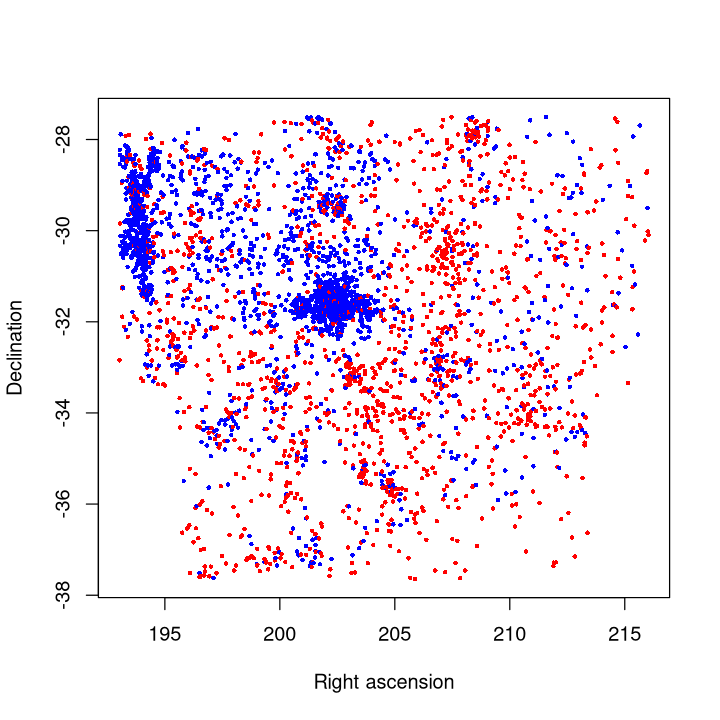

In [11]:
plot(galaxy$R.A., galaxy$Dec., pch = 16, cex = .5,
   xlab = "Right ascension",
   ylab = "Declination",
   col=c("blue", "red")[1 + (galaxy$Mag < 16)])

La magnitud es el brillo visual medido en una escala de registro invertida: los números más grandes son más oscuros. Cada incremento en una unidad es aproximadamente 2.5 veces más débil. Una magnitud de 6 es aproximadamente el límite del ojo humano; esto se extiende a unos 10 con binoculares. La magnitud 27 es el límite aproximado de los telescopios terrestres más grandes, y el Telescopio Espacial Hubble puede detectar la magnitud 32. En el gráfico, las galaxias más brillantes (y generalmente más cercanas) están en rojo y las más tenues en azul.

Las galaxias más brillantes en rojo parecen estar distribuidas uniformemente a través de este campo, pero las más tenues en azul parecen agruparse en la parte superior izquierda de esta figura. Se sabe que las galaxias no están distribuidas uniformemente, sino más bien, agrupadas como la superficie de las burbujas, en paredes curvas, centradas alrededor de vastos espacios aparentemente vacíos.

Por supuesto, esta figura sólo muestra los objetos registrados en el momento en que se recopilaron los datos. Las galaxias más oscuras, que aún no han sido detectadas, no están. En la medida que mejore la tecnología, habría muchos más objetos que se dibujarían en azul.